# **Regression models on the data of quasar candidates by G. Richards et al., ApJS, 219, 39 (2015)**

**Author: Franciszek Humieja**

In [70]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import normaltest, kstest, zscore

# 1. About the Data

The data I am going to investigate is the real astrophysical catalog of candidates for quasi-stellar objects (QSO or quasars) prepared by G. Richards et al. 2015 ApJS 219 39. This data set contains a catalog of astrophysical objects that are likely to be quasars but lack unambiguous spectroscopic confirmation.

The more detailed description of the analysis and resulting data of Richards et al. is available in [my report of the exploratory data analysis (EDA) of this data set](https://github.com/frank01101/quasar_candidates/blob/main/quasars-report.pdf). Moreover, the PDF report summarizes main results obtained in [my Jupyter notebook with all EDA calculations](https://github.com/frank01101/quasar_candidates/blob/main/quasars_eda.ipynb). The notebook takes the [original data of Richards et al.](https://cdsarc.cds.unistra.fr/ftp/J/ApJS/219/39/) (the file `cand.dat.gz`) and performs EDA, consisting of:
1. data wrangling,
2. data cleaning:
   1. whitespaces removing,
   2. handling duplicates,
   3. handling missing values,
   4. handling outliers,
3. feature engineering:
   1. calculating new features motivated by physics: colors,
   2. calculating polynomials of features,
   3. feature scaling,
   4. one-hot encoding,
4. numerical and visual analysis of main correlations,
5. significance testing of statistical hypotheses.

After performing these steps, the notebook exports the cleaned data as `cand_cleaned.csv` file that is the input data for the regression analysis below.

Let us start with importing the cleaned catalog of quasar candidates.

In [2]:
catalog_full = pd.read_csv('cand_cleaned.csv', index_col=0)
catalog_full

,RAdeg,DEdeg,Class,zsp,umag,gmag,rmag,imag,zmag,3.6mag,...,e_z-3.6,e_3.6-4.5,log_u-g,log_g-r,log_r-i,e_log_u-g,e_log_g-r,e_log_r-i,robust,robust_contamin
0,0.000629,35.517841,U,NaN,18.571,18.330,18.197,18.241,18.089,17.119,...,0.033106,0.043139,2.289323,1.290059,1.083837,0.003077,0.003114,0.004074,True,False
1,0.000831,15.197328,U,NaN,22.647,21.808,20.873,20.615,20.326,18.845,...,0.121433,0.104623,2.416402,1.489528,1.181114,0.034162,0.011258,0.012618,True,False
2,0.001527,27.732283,U,NaN,22.052,21.703,21.603,21.550,21.915,20.174,...,0.392868,0.316760,2.312791,1.280934,1.116125,0.036852,0.025557,0.036452,False,False
3,0.001914,9.385637,U,NaN,18.395,18.375,18.299,18.178,18.004,17.888,...,0.046957,0.060828,2.240536,1.274245,1.138153,0.008060,0.010024,0.010132,True,False
4,0.002595,31.328981,U,NaN,19.592,19.431,19.425,19.285,18.907,18.903,...,0.068000,0.100000,2.271783,1.254476,1.144223,0.005552,0.005449,0.007071,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885498,359.999115,28.954735,U,NaN,21.994,21.351,21.391,21.311,20.869,19.902,...,0.181959,0.210874,2.375500,1.241269,1.124930,0.022694,0.015261,0.022988,False,False
885499,359.999115,1.647538,U,NaN,20.256,20.296,19.944,19.722,19.793,18.962,...,0.119004,0.128226,2.227106,1.348592,1.170002,0.013592,0.011378,0.012603,True,False
885500,359.999207,-4.507331,U,NaN,21.573,20.703,20.288,20.144,19.979,20.180,...,0.203443,0.477620,2.422808,1.364815,1.145496,0.016115,0.007261,0.008558,False,False
885501,359.999756,-9.776147,U,NaN,21.366,21.403,21.133,21.157,21.024,19.076,...,0.303058,0.198565,2.227779,1.327075,1.090580,0.023125,0.017077,0.029457,False,False


In [3]:
catalog_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885449 entries, 0 to 885502
Data columns (total 81 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RAdeg            885449 non-null  float64
 1   DEdeg            885449 non-null  float64
 2   Class            885449 non-null  object 
 3   zsp              151350 non-null  float64
 4   umag             885449 non-null  float64
 5   gmag             885449 non-null  float64
 6   rmag             885449 non-null  float64
 7   imag             885449 non-null  float64
 8   zmag             885449 non-null  float64
 9   3.6mag           885449 non-null  float64
 10  4.5mag           885449 non-null  float64
 11  e_umag           885449 non-null  float64
 12  e_gmag           885449 non-null  float64
 13  e_rmag           885449 non-null  float64
 14  e_imag           885449 non-null  float64
 15  e_zmag           885449 non-null  float64
 16  e_3.6mag         885449 non-null  float64
 

The most important features are:
* `RAdeg` and `DEdeg` – the celestial coordinates (right ascension and declination) of an object in degrees.
* `Class` – the spectral classification result of an object. If the spectral analysis was available, the object was classified either as quasar (_QSO_), galaxy (_GALAXY_), star (_STAR_), compact emission line galaxy (_CELG_) or hard to interpret (_??_). Otherwise, if no spectrum is provided, the object is unclassified (_U_).
* `zsp` – spectroscopic redshift for the objects with spectrum available.
* `umag`, ..., `zmag` – _SDSS_ magnitudes in optical and near-infrared _u, g, r, i_ and _z_ passbands.
* `3.6mag` and `4.5mag` – _Spitzer_ magnitudes in mid-infrared _ch1_ and _ch2_ passbands (having effective wavelength midpoints at $3.6\,\mathrm{\mu m}$ and $4.5\,\mathrm{\mu m}$, respectively).
* `Ymag`, ..., `Kmag` – _UKIDSS_ and _VHS_ magnitudes in near-infrared _Y, J, H_ and _K_ passbands. Provided to only a fraction of objects.
* `FUV` and `NUV` – _GALEX_ magnitudes in ultra-violet passbands. Provided to only a fraction of objects.
* Columns starting with `e_` – standard errors (uncertainties) of the corresponding values.
* `gisig` – an indicator of distance (in units of confidence level) from the average curve in a regression-like problem of finding photometric redshift.
* `zphO` – the best estimate for photometric redshift calculated through regression trained with a relationship between spectroscopic redshift and _ugriz_ magnitudes. 
  * `b_zphO` – the minimum estimate for photometric redshift (_ugriz_).
  * `B_zphO` – the maximum estimate for photometric redshift (_ugriz_).
  * `zphOP` – a probability of the true redshift to be between minimum and maximum estimates of photometric redshift (_ugriz_).
* `zphIR` – similar to `zphO` but trained using _ugrizJHK_ magnitudes. Available only for those sources with _JHK_ photometry performed.
* `pm` – proper motion (speed of motion in the sky) of an object in milliarcseconds per year.
* `DB` – bitwise flag indicating low-redshift ($2^0$), mid-redshift ($2^1$) and high-redshift ($2^2$) sources according to the survey selections; objects belonging to more than one category have number equal to sum of its category components.
* `u-g`, ..., `3.6-4.5` – colors, which are differences between magnitudes in different passbands.
* `robust` – if an object is “robust”, according to specifications given by Richards et al. (2015).
* `robust_contamin` – “robust” objects that were spectroscopically classified not to be quasars (contaminants).

The classification conditions for the “robust” sources are as follows (Richards et al., 2015):

1. `zphOP` $ > 0.8 $ and
2. $abs($ `gisig` $) \leq 0.95 $.

Moreover, for high-redshift objects, $3.5<z<5$, the additional conditions are:

3. `NUV` and `FUV` are _NA_ (nondetections in _GALEX_ – real high-$z$ quasars are unlikely to be detected) and
4. `imag` $< 22$ (point-like objects of the 22nd or greated magnitude have a significant probality of being galaxies at these redshifts).

# 2. Objectives

The main objective of this analysis is to investigate correlations between color variables and redshift for the purpose of predicting unknown redshift from easy-to-obtain color information by training various linear regression models. A successful model like this would be very helpful in astrophysics because many objects lack spectroscopic observations and, consequently, information of their redshift.

The variables of our interest are _colors_: `u-g`, ..., `3.6-4.5`, along with their uncertainties `e_u-g`, ..., `e_3.6-4.5`, and _spectroscopic redshift_, `zsp`, which has been measured for $151350$ objects out of all $885449$ candidates. Moreover, all the objects have _photometric redshift_, `zphO` (and `zphIR` for $171831$ objects), calculated independently by authors of the cited paper from the relationship between magnitudes and spectroscopic redshift. This variable can be a test for the values of redshift we will derive from our regression problems, especially for the robust subset of data for which the spectroscopic redshift estimate is believed to be more reliable.

# 3. Linear Regression Models

## 3.1. Data cleaning

The preceding notebook with EDA of this dataset performed many important cleaning and feature engineering actions. Nevertheless, the current regression analysis requires some additional data preprocessing operations to be done.

In this regression problem we need to investigate the relationship between redshift and colors only for proven quasars (the _QSO_ category in `Class`) and get rid of all known contaminants in the sample (although their quantity is rather negligible).

In [4]:
catalog_full['Class'].value_counts()

Class
U         733669
QSO       150443
STAR         743
GALAXY       557
CELG          32
??             5
Name: count, dtype: int64

In [5]:
QSO = catalog_full['Class'] == 'QSO'
U = catalog_full['Class'] == 'U'

In [6]:
catalog = catalog_full[QSO | U].copy()

Note that the _U_ class still may have unrevealed contaminants. We will be predicting values of redshift for the objects of this class.

Let us, moreover, define a bunch of useful masks.

In [7]:
QSO = QSO.reindex(index=catalog.index)
U = U.reindex(index=catalog.index)

In [8]:
robust = catalog['robust']

In [9]:
low_z = catalog['DB'].isin({1, 3, 5, 7})
mid_z = catalog['DB'].isin({2, 3, 6, 7})
high_z = catalog['DB'].isin({4, 5, 6, 7})

In [10]:
colors = pd.Index(['u-g', 'g-r', 'r-i', 'i-z', 'z-3.6', '3.6-4.5'])
e_colors = pd.Index(
        ['e_u-g', 'e_g-r', 'e_r-i', 'e_i-z', 'e_z-3.6', 'e_3.6-4.5'])

### 3.1.1. Spectroscopic redshift

Let us begin by examining the spectroscopic redshift `zsp` distribution for all and robust sources.

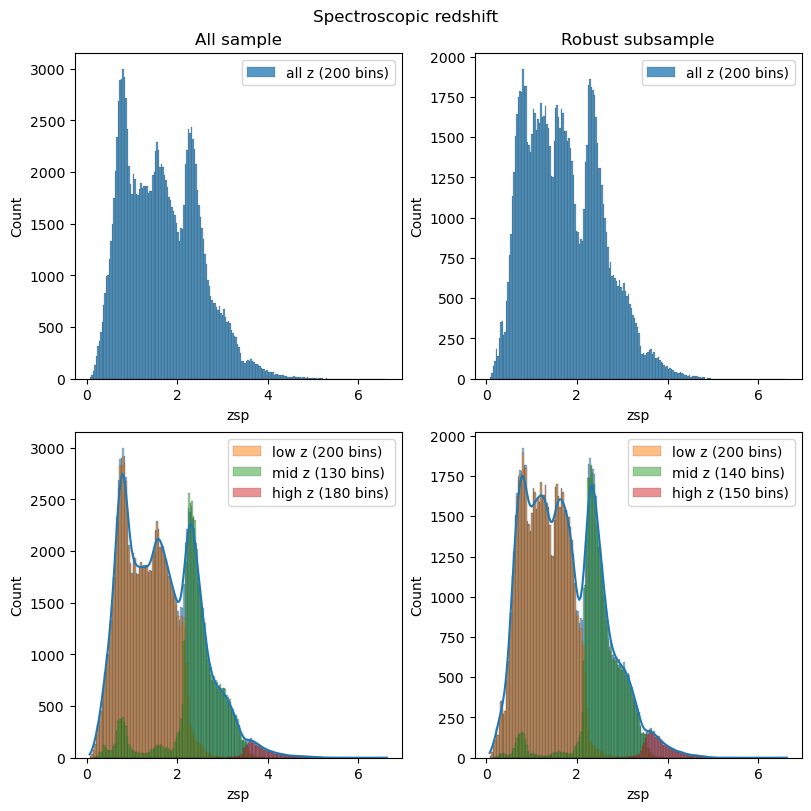

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), layout='constrained')
# upper left
sns.histplot(ax=axs[0, 0], x=catalog['zsp'], bins=200, label='all z (200 bins)')
axs[0, 0].legend()
#upper right
sns.histplot(ax=axs[0, 1], x=catalog.loc[robust, 'zsp'], bins=200, label='all z (200 bins)')
axs[0, 1].legend()
# lower left
sns.histplot(ax=axs[1, 0], x=catalog['zsp'], bins=200, kde=True)
sns.histplot(ax=axs[1, 0], x=catalog.loc[low_z, 'zsp'], bins=200, alpha=0.5, label='low z (200 bins)')
sns.histplot(ax=axs[1, 0], x=catalog.loc[mid_z, 'zsp'], bins=130, alpha=0.5, label='mid z (130 bins)')
sns.histplot(ax=axs[1, 0], x=catalog.loc[high_z, 'zsp'], bins=180, alpha=0.5, label='high z (180 bins)')
axs[1, 0].legend()
# lower right
sns.histplot(ax=axs[1, 1], x=catalog.loc[robust, 'zsp'], bins=200, kde=True)
sns.histplot(ax=axs[1, 1], x=catalog.loc[robust & low_z, 'zsp'], bins=200, alpha=0.5, label='low z (200 bins)')
sns.histplot(ax=axs[1, 1], x=catalog.loc[robust & mid_z, 'zsp'], bins=140, alpha=0.5, label='mid z (140 bins)')
sns.histplot(ax=axs[1, 1], x=catalog.loc[robust & high_z, 'zsp'], bins=150, alpha=0.5, label='high z (150 bins)')
axs[1, 1].legend()
fig.suptitle('Spectroscopic redshift')
axs[0,0].set_title('All sample')
axs[0,1].set_title('Robust subsample')
plt.show()

We need to remove outliers in each redshift class separately. Let us first see the boxplots.

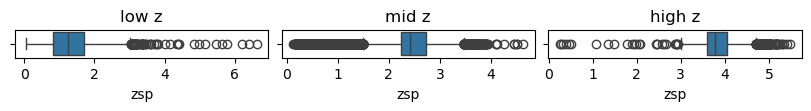

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(8, 1), layout='constrained')
sns.boxplot(ax=axs[0], x=catalog.loc[low_z, 'zsp'])
sns.boxplot(ax=axs[1], x=catalog.loc[mid_z, 'zsp'])
sns.boxplot(ax=axs[2], x=catalog.loc[high_z, 'zsp'])
axs[0].set_title('low z')
axs[1].set_title('mid z')
axs[2].set_title('high z')
plt.show()

We will use the interquartile range for removing outliers. It is a counterpart for standard deviation but less sensitive for outliers (which are quite numerous). We will use the common convention of removing points further away from the first quartile than $1.5$ times interquartile range to the left and from the third quartile of the same distance to the right. They are exactly all the points beyond the whiskers visible in the boxplots above.

In [13]:
def iqr_cut(mask):
    q25 = catalog.loc[mask, 'zsp'].quantile(0.25)
    q75 = catalog.loc[mask, 'zsp'].quantile(0.75)
    iqr = q75 - q25
    lower_cut = q25 - 1.5*iqr
    upper_cut = q75 + 1.5*iqr
    return (lower_cut, upper_cut)

In [14]:
for z_mask, column in (
        (low_z, 'clean_low'), (mid_z, 'clean_mid'), (high_z, 'clean_high')):
    min_z, max_z = iqr_cut(z_mask)
    in_whiskers = (catalog['zsp'] >= min_z) & (catalog['zsp'] <= max_z)
    catalog[column] = in_whiskers & z_mask

In [15]:
clean_low = catalog['clean_low']
clean_mid = catalog['clean_mid']
clean_high = catalog['clean_high']

In [16]:
pd.DataFrame(
        {'clean_low: zsp': catalog.loc[clean_low, 'zsp'].describe(),
         'clean_mid: zsp': catalog.loc[clean_mid, 'zsp'].describe(),
         'clean_high: zsp': catalog.loc[clean_high, 'zsp'].describe()})

,clean_low: zsp,clean_mid: zsp,clean_high: zsp
count,108232.000000,45229.000000,3026.000000
mean,1.280612,2.534263,3.817694
std,0.536610,0.362119,0.305063
min,0.063610,1.498650,3.008700
25%,0.821767,2.283000,3.600115
50%,1.257990,2.454460,3.753140
75%,1.706025,2.758990,3.990787
max,3.025380,3.472070,4.696300


To sum up data cleaning, we made `cat_low`, `cat_mid` and `cat_high` containing only spectroscopically confirmed quasars that are cleaned from outliers and that will serve as train sets for our regressions.

In [17]:
qso_all = (
        catalog['clean_low']
        | catalog['clean_mid']
        | catalog['clean_high']).sum()
qso_sum = (
        catalog['clean_low'].sum()
        + catalog['clean_mid'].sum()
        + catalog['clean_high'].sum())
print(f'There are {qso_all} quasars in the cleaned sample but sum of all',
      f'three subsamples is {qso_sum}, because the subsamples intersect.')

There are 149347 quasars in the cleaned sample but sum of all three subsamples is 156487, because the subsamples intersect.


Finally, after the cleaning, we can plot the distribution of all three populations of quasars according to their redshift value.

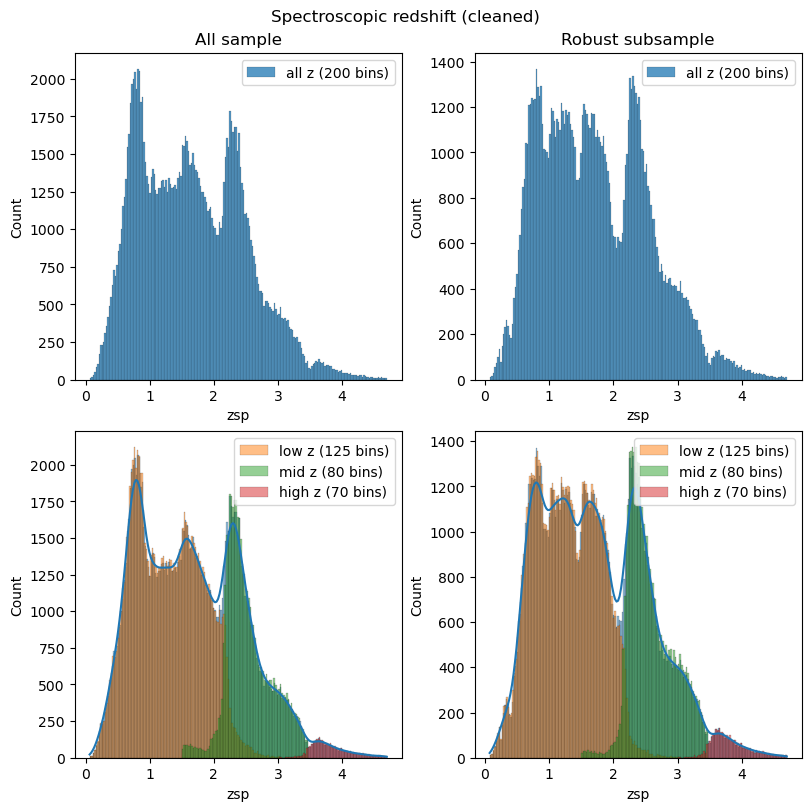

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), layout='constrained')
# upper left
sns.histplot(ax=axs[0, 0], x=catalog.loc[clean_low | clean_mid | clean_high, 'zsp'], bins=200, label='all z (200 bins)')
axs[0, 0].legend()
#upper right
sns.histplot(ax=axs[0, 1], x=catalog.loc[robust & (clean_low | clean_mid | clean_high), 'zsp'], bins=200, label='all z (200 bins)')
axs[0, 1].legend()
# lower left
sns.histplot(ax=axs[1, 0], x=catalog.loc[clean_low | clean_mid | clean_high, 'zsp'], bins=200, kde=True)
sns.histplot(ax=axs[1, 0], x=catalog.loc[clean_low, 'zsp'], bins=125, alpha=0.5, label='low z (125 bins)')
sns.histplot(ax=axs[1, 0], x=catalog.loc[clean_mid, 'zsp'], bins=80, alpha=0.5, label='mid z (80 bins)')
sns.histplot(ax=axs[1, 0], x=catalog.loc[clean_high, 'zsp'], bins=70, alpha=0.5, label='high z (70 bins)')
axs[1, 0].legend()
# lower right
sns.histplot(ax=axs[1, 1], x=catalog.loc[robust & (clean_low | clean_mid | clean_high), 'zsp'], bins=200, kde=True)
sns.histplot(ax=axs[1, 1], x=catalog.loc[robust & clean_low, 'zsp'], bins=125, alpha=0.5, label='low z (125 bins)')
sns.histplot(ax=axs[1, 1], x=catalog.loc[robust & clean_mid, 'zsp'], bins=80, alpha=0.5, label='mid z (80 bins)')
sns.histplot(ax=axs[1, 1], x=catalog.loc[robust & clean_high, 'zsp'], bins=70, alpha=0.5, label='high z (70 bins)')
axs[1, 1].legend()
fig.suptitle('Spectroscopic redshift (cleaned)')
axs[0,0].set_title('All sample')
axs[0,1].set_title('Robust subsample')
plt.show()

The cleaning process removed the unwanted tails from the redshift distributions.

### 3.1.2. Color variables

For convenience, let us define the following frames as subsets of the catalog.

In [19]:
cat_all = catalog[robust & (clean_low | clean_mid | clean_high)]
cat_low = catalog[robust & clean_low]
cat_mid = catalog[robust & clean_mid]
cat_high = catalog[robust & clean_high]

We will take a look at the color variables with respect to the division for low, mid and high $z$, defined above. Let us check the colors for the robust subset in each of the redshift regimes.

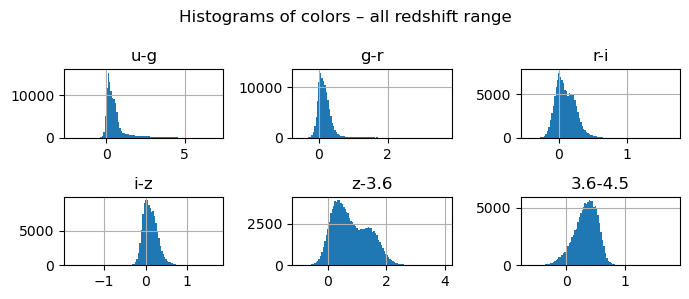

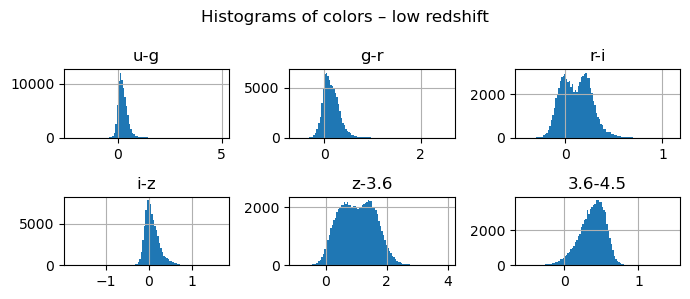

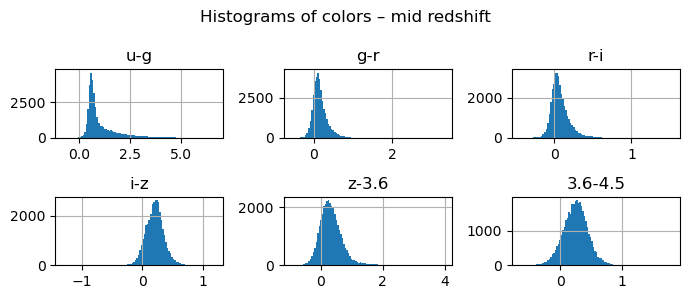

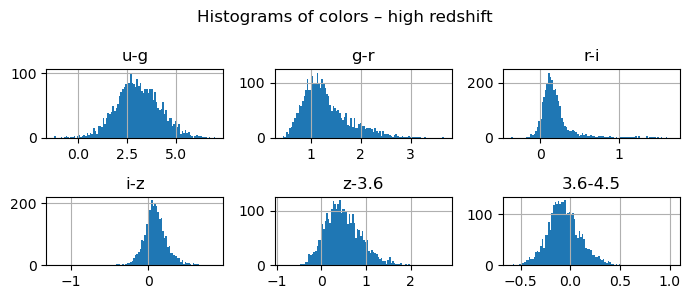

In [20]:
cat_all.hist(column=colors, bins=100, figsize=(7,3), layout=(2,3))
plt.suptitle('Histograms of colors – all redshift range')
plt.tight_layout()
cat_low.hist(column=colors, bins=100, figsize=(7,3), layout=(2,3))
plt.suptitle('Histograms of colors – low redshift')
plt.tight_layout()
cat_mid.hist(column=colors, bins=100, figsize=(7,3), layout=(2,3))
plt.suptitle('Histograms of colors – mid redshift')
plt.tight_layout()
cat_high.hist(column=colors, bins=100, figsize=(7,3), layout=(2,3))
plt.suptitle('Histograms of colors – high redshift')
plt.tight_layout()

As we can see, many of the colors have a bell-looking distrubution – some having a significant skewness. There is, however, a few examples of non-normal distributions, having for instance two peaks in the low redshift regime. Let us keep in mind that in the same redshift range the zsp distribution has 3 peaks, so we may expect some level of inaccuracy of the model we are building in this case.

Moreover, some of the distributions exhibit a presence of outliers. Let us, however, keep in mind that the problem of outliers in the original magnitude variables was discussed in the previous EDA analysis notebook where the appropriate removal of uncertain data points was performed. The color variables, in turn, being differences of already cleaned magnitudes, may show new outliers for objects with differing magnitudes in the neighboring bands. This may be a manifestation of the physical properties of some of the objects, so these cases cannot be automatically considered an error of the data. The question whether exclude these extreme color points from the model or not seems to be open.

Let us visualize the influence of these points on the scatter plots between the colors and the redshift for one of the colors. More scatter plots (for the entire redshift range) can be seen in the preceding EDA notebook.

In [21]:
kde_low_sample = cat_low.sample(n=10000)
kde_mid_sample = cat_mid.sample(n=10000)
kde_high_sample = cat_high  # this population is smaller than 10000

<Axes: xlabel='u-g', ylabel='zsp'>

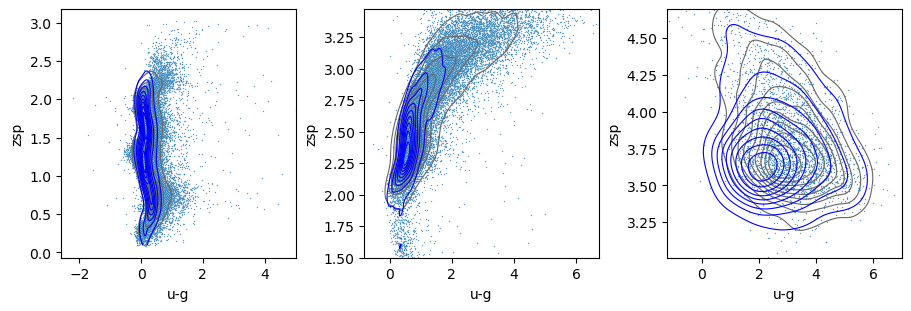

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), layout='constrained')
sns.scatterplot(ax=axs[0], data=cat_low, x='u-g', y='zsp', s=1, alpha=0.7)
sns.kdeplot(ax=axs[0], data=kde_low_sample, x='u-g', y='zsp', cut=0, linewidths=0.8, color='0.4')
sns.kdeplot(ax=axs[0], data=kde_low_sample, x='u-g', y='zsp', weights=1/kde_low_sample['e_u-g']**2, cut=0, linewidths=0.8, color="b")
sns.scatterplot(ax=axs[1], data=cat_mid, x='u-g', y='zsp', s=1, alpha=0.7)
sns.kdeplot(ax=axs[1], data=kde_mid_sample, x='u-g', y='zsp', cut=0, linewidths=0.8, color='0.4')
sns.kdeplot(ax=axs[1], data=kde_mid_sample, x='u-g', y='zsp', weights=1/kde_mid_sample['e_u-g']**2, cut=0, linewidths=0.8, color="b")
sns.scatterplot(ax=axs[2], data=cat_high, x='u-g', y='zsp', s=1, alpha=0.7)
sns.kdeplot(ax=axs[2], data=kde_high_sample, x='u-g', y='zsp', cut=0, linewidths=0.8, color='0.4')
sns.kdeplot(ax=axs[2], data=kde_high_sample, x='u-g', y='zsp', weights=1/kde_high_sample['e_u-g']**2, cut=0, linewidths=0.8, color="b")

The figures have KDE contour plots added to highlight the regions of the main point concentration. The gray lines indicate the contour made without weights and the blue lines is the weighted contour, based on the color uncertainties in the data.

The outliers in the example above are visible but they constitute a small fraction of all the points. Moreover, the middle plot shows that the main belt of points extends to higher color index as the redshift increases. This indicates that a simple interquartile region cut of color indices cannot be used because it would cut off a part of the main trend of this dependence. These arguments can lead us to the conclusion that we can skip performing any additional outlier removal because our models should work properly anyway.

## 3.2. Normality of the target variable

The linear regression analysis requires the depended variable `zsp` to be normally distributed. From the histograms above, we can see that redshift in the range of its mid and high values posseses a bell-shaped distribution with some skewness visible. In the case of the low values, redshift has more complex distribution with three peaks visible for the case of the robust dataset. Based on all information stored in the dataset, it seems we cannot find a hint for any fundamental division of the data in this regime that could reliably indicate separate bell-shaped subdistributions that form the visible final shape. Nevertheless, we will try to work with the distribution as it is in this regime and build our model, having in mind that this may lessen its robustness.

Let us begin with checking the skewness of `zsp`.

In [35]:
print('Skewness of spectroscopic redshift zsp for each redshift regime:')
pd.Series(
        {'all z': cat_all.skew(numeric_only=True)['zsp'],
         'low z': cat_low.skew(numeric_only=True)['zsp'],
         'mid z': cat_mid.skew(numeric_only=True)['zsp'],
         'high z': cat_high.skew(numeric_only=True)['zsp']})

Skewness of spectroscopic redshift zsp for each redshift regime:


all z     0.456006
low z     0.083787
mid z     0.498808
high z    0.726946
dtype: float64

So, the low value redshift has fairly symmetrical curve distribution, while the mid and high value ranges have moderately skewed distributions.

Now, we check normality of `zsp` with the D'Agostino-Pearson and Kolmogorov-Smirnov tests. For these tests we choose the confidence level of $0.99$, i.e., we will reject the null hypothesis, that the data distribution is normal, when the test statistic exceeds its value assigned to the significance level of 0.01, i.e., when the p-value is lesser than 0.01. Remember that the Kolmogorov-Smirnov test made with `scipy.stats.kstest(cdf='norm')` needs the data to be normalized which we perform with `scipy.stats.zscore()`.

In [69]:
print("Normality tests for zsp (D'Agostino-Pearson and Kolmogorov-Smirnov):")
indices = [['all z', 'low z', 'mid z', 'high z'], ['statistic', 'p-value']]
dap_all = normaltest(a=cat_all['zsp'])
dap_low = normaltest(a=cat_low['zsp'])
dap_mid = normaltest(a=cat_mid['zsp'])
dap_high = normaltest(a=cat_high['zsp'])
ks_all = kstest(rvs=zscore(cat_all['zsp']), cdf='norm')
ks_low = kstest(rvs=zscore(cat_low['zsp']), cdf='norm')
ks_mid = kstest(rvs=zscore(cat_mid['zsp']), cdf='norm')
ks_high = kstest(rvs=zscore(cat_high['zsp']), cdf='norm')
pd.DataFrame(
    data={"D'A-P": [dap_all[0], dap_all[1],
                    dap_low[0], dap_low[1],
                    dap_mid[0], dap_mid[1],
                    dap_high[0], dap_high[1]],
          'K-S': [ks_all[0], ks_all[1],
                  ks_low[0], ks_low[1],
                  ks_mid[0], ks_mid[1],
                  ks_high[0], ks_high[1]]},
    index=pd.MultiIndex.from_product(iterables=indices, names=['regime', 'parameter']))

Normality tests for zsp (D'Agostino-Pearson and Kolmogorov-Smirnov):


D'A-P            K-S
regime parameter                             
all z  statistic  4.450177e+03   5.767538e-02
       p-value    0.000000e+00   0.000000e+00
low z  statistic  7.535651e+03   5.328761e-02
       p-value    0.000000e+00  3.382461e-192
mid z  statistic  1.440986e+03   9.464922e-02
       p-value    0.000000e+00  2.896075e-279
high z statistic  2.144472e+02   8.563386e-02
       p-value    2.712578e-47   4.514549e-19

In [52]:
kstest(rvs=cat_high['zsp'], cdf='norm')

KstestResult(statistic=np.float64(0.9986881597518377), pvalue=np.float64(0.0), statistic_location=np.float64(3.0087), statistic_sign=np.int8(-1))

## 3.3. Model fitting

We are going to construct three separate regression models, each for separate redshift range, as we determined above (low, mid and high $z$). This is because our data set was built as a compilation of various surveys aiming at different redshift ranges. By the information containted in the data (the `DB` column) we were able to find the separation of the data points into each of the three classes which is consistent with the multi-origin nature of our data. These models can be used for prediction in the following way: one puts the color indices of a given object to all of the three models for prediction and obtains three results for the redshift, each with different probability basing on the above spectroscopical redshift `zsp` distribution in the appropriate regime.

## 3.2. (OLD) Feature engineering

The preceding notebook with EDA of this dataset showed that the color variables had skewed distributions, but it lacked the boxcox transformation to lessen the skewness. Let us perform this short feature engineering now, using the output of the above cleaning. We will be working on the “robust” subset of the data only.

First of all, let us take a look at the histograms of the color variables at each of the redshift ranges.

As we can see, many of the colors have a bell-looking distrubution – some having a significant skewness. There is, however, a few examples of non-normal distributions, having for instance two peaks in the low redshift regime. Let us keep in mind that in the same redshift range the `zsp` distribution has 3 peaks.

We will apply the boxcox transformation to obtain less skewed variables to work with.